In [54]:
import glob
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import pdb
import pickle
from itertools import product
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sys
sys.path.append("../")
from weak_feature_extractor import feat_extractor as fe

In [6]:
audio_folder = '/Users/avidwans/Documents/CBIR/CBIR_data/audio_train/'
 #list_files = glob.glob(audio_folder + '*.wav')
 
split_files = '../dcase2018_gen/data_splits/main_baseline/'
train_lbl_files = split_files + 'train.meta'
train_meta = split_files + 'train.meta'
test_lbl_files = split_files + 'test.meta'
test_meta = split_files + 'test.meta'
 
 # read train and test labels from file
 #tr_lbl_onehot = pd.read_csv(train_lbl_file, skiprows=[0], header=None)
 #ts_lbl_onehot = pd.read_csv(test_lbl_file, skiprows=[0], header=None)
 
with open(train_lbl_files) as f:
    ncols = len(f.readline().split(','))

tr_lbl_onehot = np.loadtxt(train_lbl_files, delimiter=',', skiprows=1, usecols=range(2,3))
ts_lbl_onehot = np.loadtxt(test_lbl_files, delimiter=',', skiprows=1, usecols=range(2,3))

 
tr_lbl = tr_lbl_onehot
ts_lbl = ts_lbl_onehot


In [7]:
tr_files = pd.read_csv(train_lbl_files)
tr_features = np.empty([len(tr_lbl), 1024])
ts_files = pd.read_csv(test_lbl_files)
ts_features = np.empty([len(ts_lbl), 1024])
 
tr_features = np.loadtxt("train_features.csv", delimiter=',')
ts_features = np.loadtxt("test_features.csv", delimiter=',')
 
linsvm_model = svm.SVC(kernel = 'linear', probability=True).fit(tr_features,tr_lbl)
ts_pred = linsvm_model.predict_proba(ts_features)

In [11]:
np.save('test_probab.npy', ts_pred)

In [16]:
top_3 = [np.argsort(-ts_pred, axis=1)[:, :3]]


In [17]:
top_3

[array([[18, 22, 39],
        [30, 18, 38],
        [18, 29, 39],
        ...,
        [28, 25, 34],
        [28, 15, 25],
        [28, 25, 34]])]

In [20]:
predicted_labels = [' '.join(map(str, list(x))) for x in top_3]

In [21]:
type(predicted_labels)

list

In [22]:
type(ts_lbl)

numpy.ndarray

In [31]:
df = pd.DataFrame(predicted_labels, columns=["label"])
df.to_csv('top3_pred.csv', index=False)

In [26]:
df2 = pd.DataFrame(ts_lbl, columns=["label"])
df2.to_csv("gt_lbl.csv", index=False)

In [33]:
linsvm_model2 = svm.SVC(kernel = 'linear').fit(tr_features,tr_lbl)
ts_pred2 = linsvm_model2.predict(ts_features)
cm = confusion_matrix(ts_lbl, ts_pred2)
print(cm)

[[47  0  0 ...  1  1  0]
 [ 0 57  0 ...  1  0  0]
 [ 0  0 41 ...  0  0  1]
 ...
 [ 0  2  0 ... 50  2  0]
 [ 0  0  0 ...  1 42  1]
 [ 0  0  1 ...  1  0 39]]


Confusion matrix, without normalization
[[47  0  0 ...  1  1  0]
 [ 0 57  0 ...  1  0  0]
 [ 0  0 41 ...  0  0  1]
 ...
 [ 0  2  0 ... 50  2  0]
 [ 0  0  0 ...  1 42  1]
 [ 0  0  1 ...  1  0 39]]


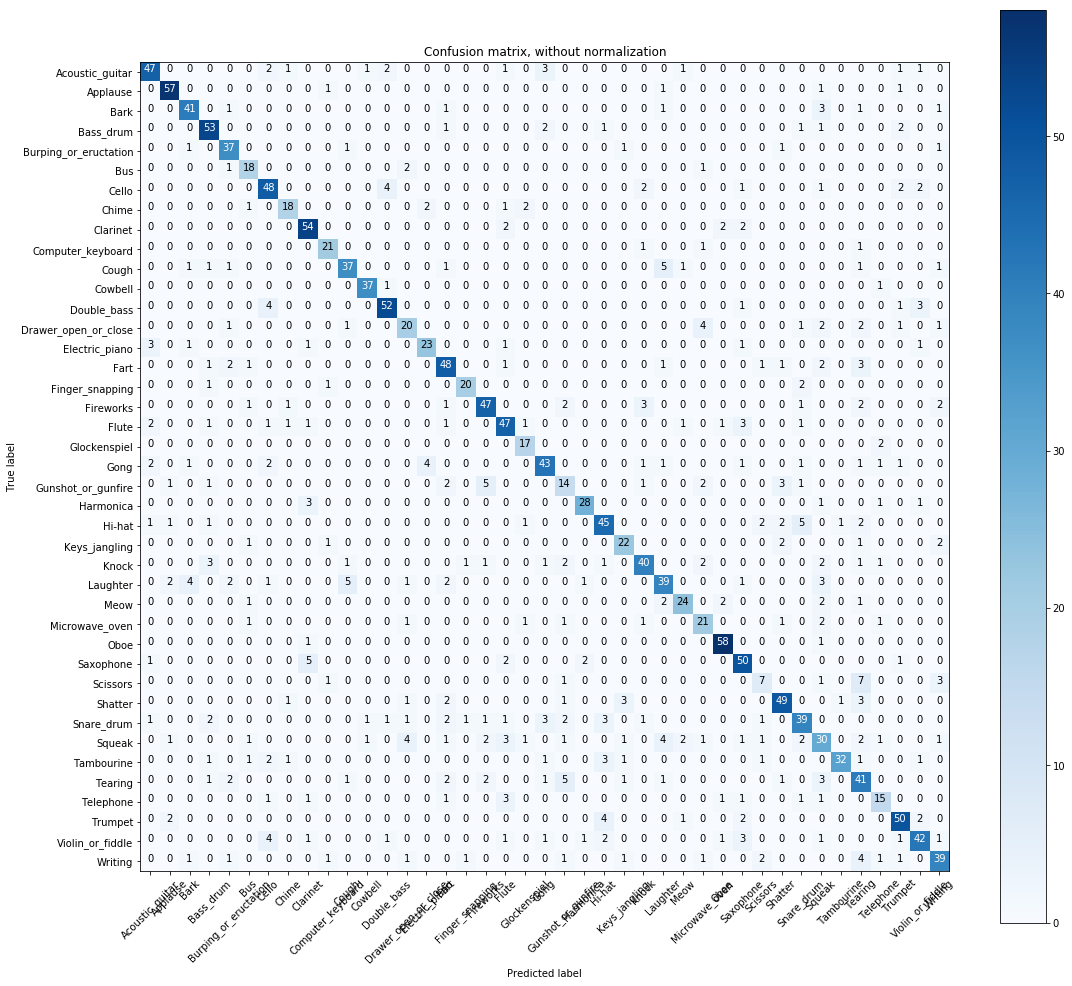

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(16, 14))
    

plot_confusion_matrix(cm, classes=['Acoustic_guitar','Applause','Bark','Bass_drum','Burping_or_eructation','Bus','Cello','Chime','Clarinet','Computer_keyboard','Cough','Cowbell','Double_bass','Drawer_open_or_close','Electric_piano','Fart','Finger_snapping','Fireworks','Flute','Glockenspiel','Gong','Gunshot_or_gunfire','Harmonica','Hi-hat','Keys_jangling','Knock','Laughter','Meow','Microwave_oven','Oboe','Saxophone','Scissors','Shatter','Snare_drum','Squeak','Tambourine','Tearing','Telephone','Trumpet','Violin_or_fiddle','Writing'],
                      title='Confusion matrix, without normalization')

In [65]:
len(['Acoustic_guitar','Applause','Bark','Bass_drum','Burping_or_eructation','Bus','Cello','Chime','Clarinet','Computer_keyboard','Cough','Cowbell','Double_bass','Drawer_open_or_close','Electric_piano','Fart','Finger_snapping','Fireworks','Flute','Glockenspiel','Gong','Gunshot_or_gunfire','Harmonica','Hi-hat','Keys_jangling','Knock','Laughter','Meow','Microwave_oven','Oboe','Saxophone','Scissors','Shatter','Snare_drum','Squeak','Tambourine','Tearing','Telephone','Trumpet','Violin_or_fiddle','Writing'])

41